In [1]:
#!pip install pandas_datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np 
import seaborn as sns 

In [3]:
df1 = pdr.get_data_yahoo('msft')
df1.shape

(1258, 6)

In [4]:
df1.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2017-10-19  77.930000  77.349998  77.570000  77.910004  15092800.0  73.208122
2017-10-20  78.970001  78.220001  78.320000  78.809998  22866400.0  74.053780
2017-10-23  79.339996  78.760002  78.989998  78.830002  20627200.0  74.072609
2017-10-24  79.199997  78.459999  78.900002  78.860001  17517200.0  74.100769
2017-10-25  79.099998  78.010002  78.580002  78.629997  20410800.0  73.884659

In [5]:
df1.describe()

High          Low         Open        Close        Volume  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03   
mean    189.495533   185.503498   187.572305   187.585525  2.993866e+07   
std      77.762778    76.092428    76.970197    76.964410  1.282448e+07   
min      77.930000    77.349998    77.570000    77.910004  7.425600e+06   
25%     112.067499   110.232500   111.295002   111.699997  2.183128e+07   
50%     183.250000   176.800003   180.409996   180.324997  2.667820e+07   
75%     258.757492   252.710003   255.982506   254.207500  3.397100e+07   
max     349.670013   342.200012   344.619995   343.109985  1.112421e+08   

         Adj Close  
count  1258.000000  
mean    184.171887  
std      78.046937  
min      73.208122  
25%     106.869612  
50%     176.102180  
75%     253.185093  
max     340.882812

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-10-19 to 2022-10-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [7]:
df2 = df1.reset_index()

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [9]:
df2['Year'] = df2['Date'].dt.year

In [10]:
df2.head()

Date       High        Low       Open      Close      Volume  \
0 2017-10-19  77.930000  77.349998  77.570000  77.910004  15092800.0   
1 2017-10-20  78.970001  78.220001  78.320000  78.809998  22866400.0   
2 2017-10-23  79.339996  78.760002  78.989998  78.830002  20627200.0   
3 2017-10-24  79.199997  78.459999  78.900002  78.860001  17517200.0   
4 2017-10-25  79.099998  78.010002  78.580002  78.629997  20410800.0   

   Adj Close  Year  
0  73.208122  2017  
1  74.053780  2017  
2  74.072609  2017  
3  74.100769  2017  
4  73.884659  2017

In [11]:
df2['work_week'] = df2['Date'].dt.week
df2['month'] = df2['Date'].dt.month
df2['day_of_week'] = df2['Date'].dt.day_name()

C:\Users\gpffh\AppData\Local\Temp\ipykernel_2080\2820719063.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['work_week'] = df2['Date'].dt.week


In [12]:
sns.lineplot(data=df2, x='Date',y='High')

<AxesSubplot:xlabel='Date', ylabel='High'>

In [13]:
sns.pointplot(data=df2, x='Year',y='Low')

<AxesSubplot:xlabel='Year', ylabel='Low'>

In [14]:
sns.lineplot(data=df2, x='Date',y='High')
sns.lineplot(data=df2, x='Date',y='Low')

<AxesSubplot:xlabel='Date', ylabel='High'>

In [15]:
cond1 = ((df2['Year']==2019) | (df2['Year']==2020))
df2_1920 = df2.loc[cond1]

<AxesSubplot:xlabel='Date', ylabel='High'>

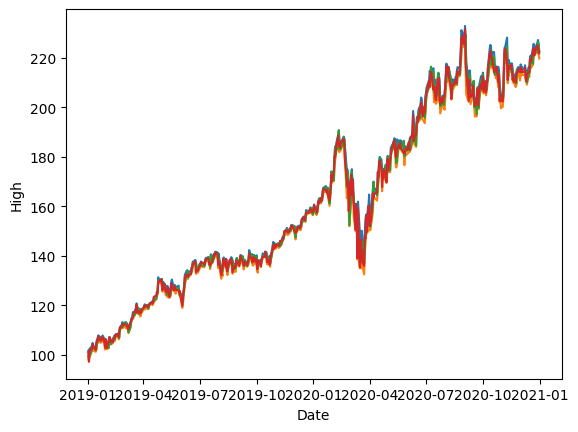

In [16]:
sns.lineplot(data=df2_1920, x='Date', y='High')
sns.lineplot(data=df2_1920, x='Date', y='Low')
sns.lineplot(data=df2_1920, x='Date', y='Open')
sns.lineplot(data=df2_1920, x='Date', y='Close')

In [17]:
import matplotlib.pyplot as plt 

<AxesSubplot:xlabel='Date', ylabel='High'>

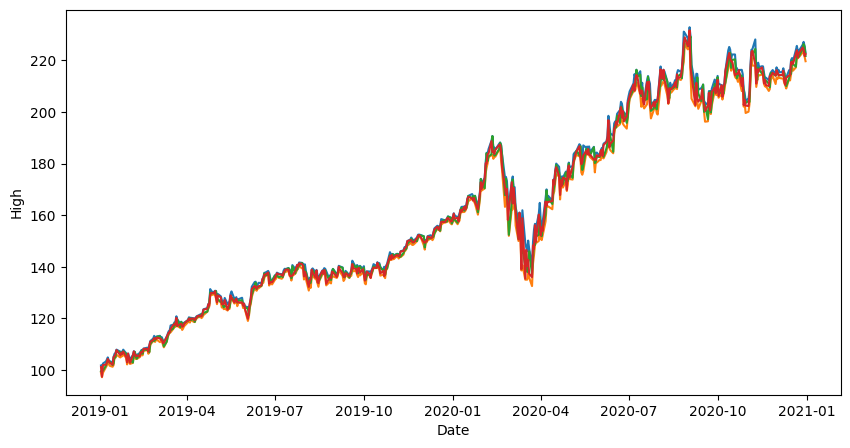

In [18]:
plt.figure(figsize=[10,5])
sns.lineplot(data=df2_1920, x='Date', y='High')
sns.lineplot(data=df2_1920, x='Date', y='Low')
sns.lineplot(data=df2_1920, x='Date', y='Open')
sns.lineplot(data=df2_1920, x='Date', y='Close')

In [19]:
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

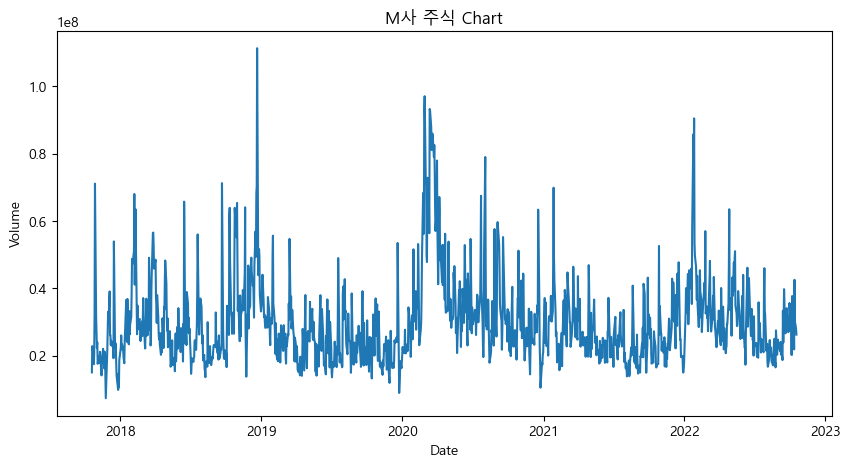

In [20]:
plt.figure(figsize=[10,5])
plt.title('M사 주식 Chart')
img = sns.lineplot(data=df2, x='Date', y='Volume')
img.get_figure().savefig('Chart.pdf')

In [21]:
pd.pivot_table(data=df2, index='Year',values='Volume')

Volume
Year              
2017  2.293349e+07
2018  3.159019e+07
2019  2.458099e+07
2020  3.765959e+07
2021  2.601301e+07
2022  3.154728e+07

In [22]:
df3 = df2[['Date','Open']]

In [23]:
df3

Date        Open
0    2017-10-19   77.570000
1    2017-10-20   78.320000
2    2017-10-23   78.989998
3    2017-10-24   78.900002
4    2017-10-25   78.580002
...         ...         ...
1253 2022-10-12  225.399994
1254 2022-10-13  219.850006
1255 2022-10-14  235.539993
1256 2022-10-17  235.820007
1257 2022-10-18  243.240005

[1258 rows x 2 columns]

In [24]:
import statsmodels.api as sm 
import warnings 
import itertools
from pylab import rcParams 

In [25]:
rcParams['figure.figsize'] = 15,10

In [26]:
#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [27]:
data1 = df3.set_index('Date')

In [28]:
y = data1['Open'].resample('1W').mean()

In [32]:
decomposition= sm.tsa.seasonal_decompose(y, freq= 11, model='additive')
fig = decomposition.plot()
plt.show()

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [33]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [35]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,
             'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [37]:
ARIMA_list.sort_values(by='AIC')

Parameter       Seasonal          AIC
27  (0, 1, 1)  (0, 1, 1, 12)  1543.075072
59  (1, 1, 1)  (0, 1, 1, 12)  1545.065636
31  (0, 1, 1)  (1, 1, 1, 12)  1545.068887
51  (1, 1, 0)  (0, 1, 1, 12)  1549.128101
43  (1, 0, 1)  (0, 1, 1, 12)  1549.507571
..        ...            ...          ...
2   (0, 0, 0)  (0, 1, 0, 12)  2241.109733
9   (0, 0, 1)  (0, 0, 1, 12)  2738.258707
1   (0, 0, 0)  (0, 0, 1, 12)  3072.703586
8   (0, 0, 1)  (0, 0, 0, 12)  3158.458196
0   (0, 0, 0)  (0, 0, 0, 12)  3515.496314

[64 rows x 3 columns]

In [38]:
mod = sm.tsa.statespace.SARIMAX(y,
                                 order=(0, 1, 1),
                                 seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1720      0.049      3.491      0.000       0.075       0.269
ma.S.L12      -1.0000    520.412     -0.002      0.998   -1020.989    1018.989
sigma2        35.9789   1.87e+04      0.002      0.998   -3.67e+04    3.67e+04


c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


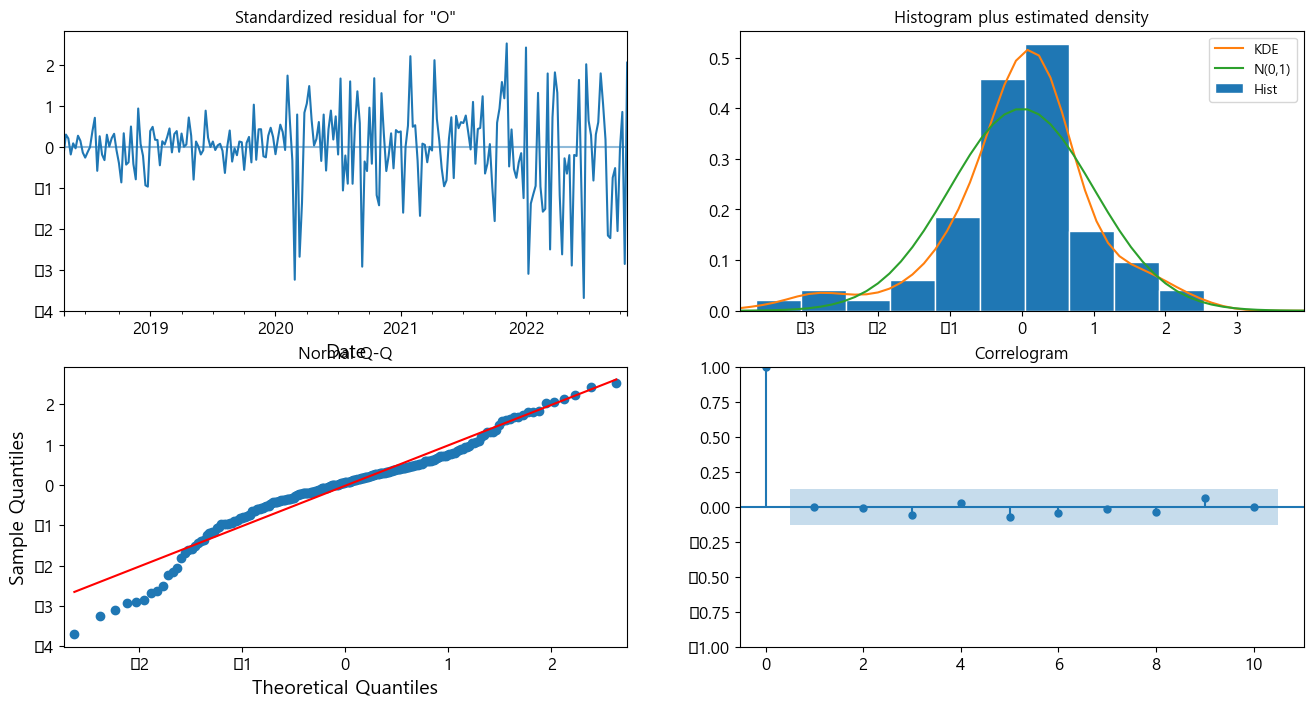

In [39]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [40]:
results.get_prediction()

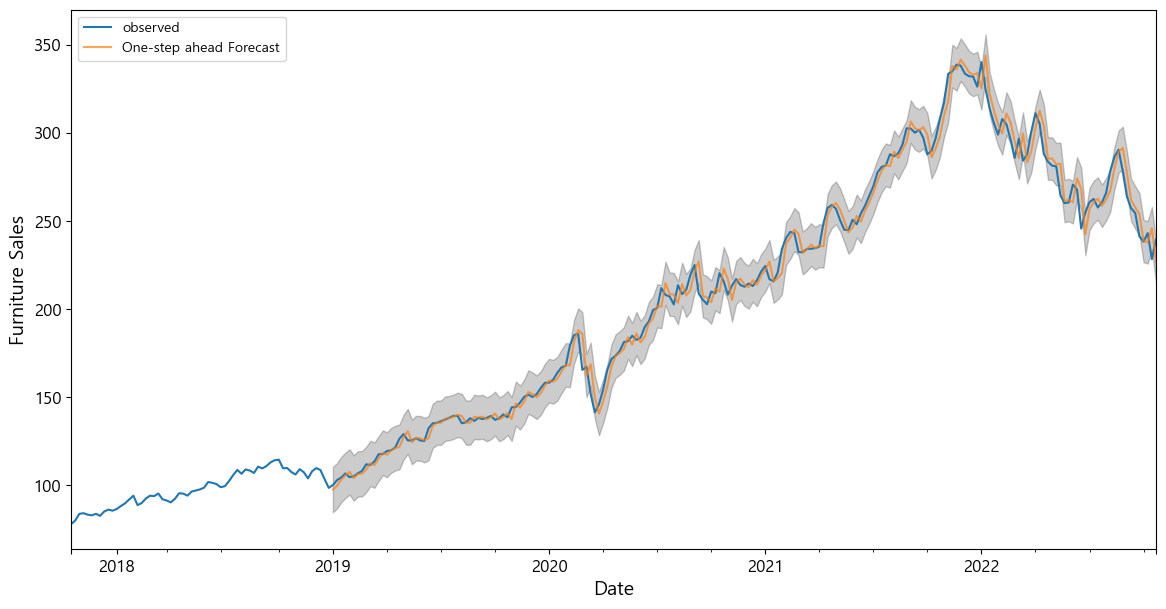

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-06'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 44.03


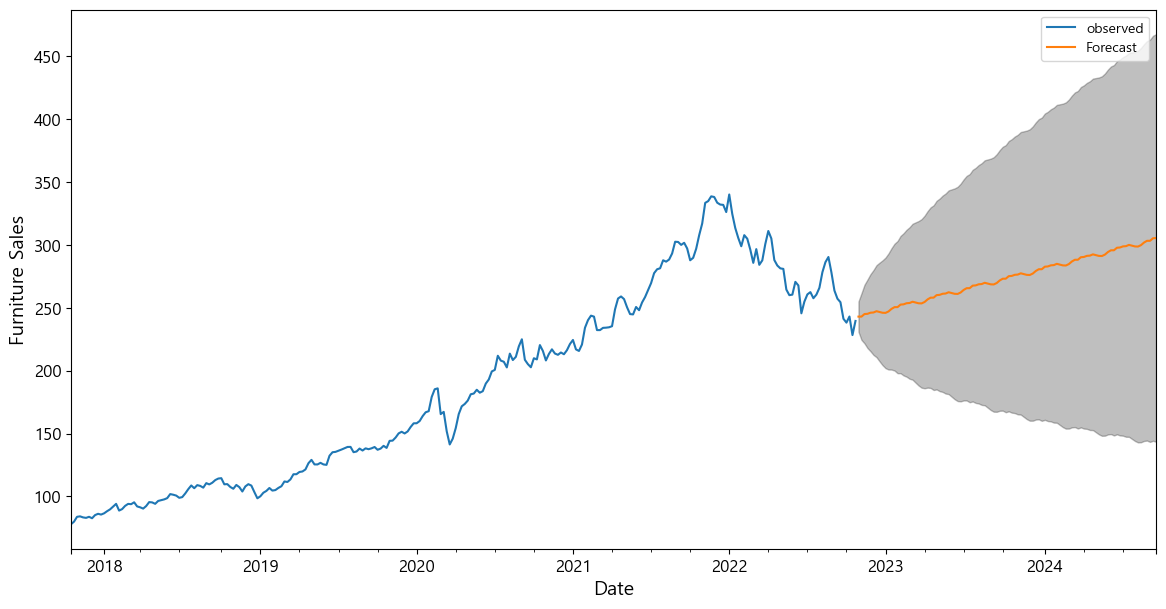

In [43]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()